# Dataset

This project uses the kaggle facial expression recognition dataset.  This dataset will be used for many of lazyprogrammer's deep learning courses.  In this case, I'm going to apply logistic regression to predict the first two classes (emotions).

The dataset is a csv which contains three columns:
1. label, emotion:
    * 0 = Angry
    * 1 = Disgust
    * 2 = Fear
    * 3 = Happy
    * 4 = Sad
    * 5 = Surprise
    * 6 = Neutral
2. pixels, 48 x 48 space separated grayscale
3. train or test set 

The data has been preprocessed so the faces are centered and each face occupies roughly the same amount of space within the image.

## Visualize Data

Below I'm going to take a look at a few examples of each label.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

#importing a function that loads, shuffles and splits data
from util import getData

#class order
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

Xtrain, Ytrain, Xtest, Ytest = getData(balance_ones=False)


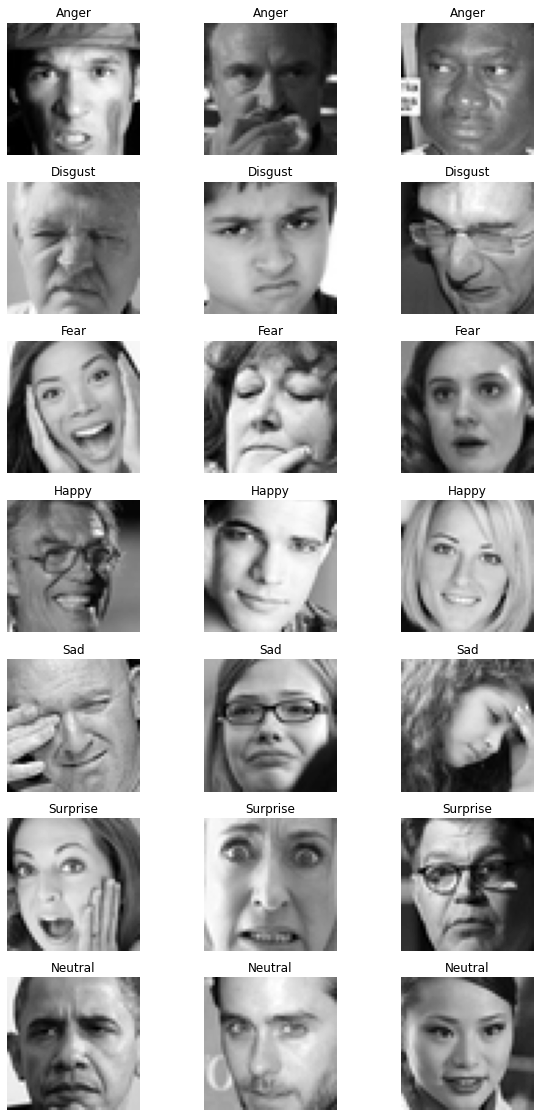

In [40]:
fig = plt.figure(figsize=(10, 20))
num_examples = 3

plot_num = 1
for i in range(len(label_map)):
   x, y = Xtrain[Ytrain==i], Ytrain[Ytrain==i] 
   
   for j in range(num_examples):
       fig.add_subplot(len(label_map), num_examples, plot_num)
       plt.imshow(x[j].reshape(48, 48), cmap = 'gray')
       plt.axis('off')
       plt.title(label_map[y[j]])
       plot_num += 1

plt.show()

## Biased Data

Since we're simply looking at classes 0 and 1, we can clearly see there is an issue - 4,806 observations of class 0 and only 529 observations of class 1.

In [43]:
pd.Series(Ytrain).value_counts()

3    8746
6    6028
4    5908
2    4976
0    4806
5    3894
1     529
dtype: int64

## Other issues

Since logistic regression is simply a linear combination of weights, e.g. works with flat vectors, no relationship between spatial position is retained.  Most neural networks work this way too, except for convolutional neural networks (CNN).

Normalizaiton is needed - pixel intensities 0 - 255 and we need 0 - 1 because this is where the functions of the neural networks are the most sensitive. 